# Cloning and making fast align plus importing needed libraries

In [1]:
! git clone https://github.com/clab/fast_align

Cloning into 'fast_align'...
remote: Enumerating objects: 213, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 213 (delta 2), reused 4 (delta 2), pack-reused 204
Receiving objects: 100% (213/213), 70.68 KiB | 552.00 KiB/s, done.
Resolving deltas: 100% (110/110), done.


In [2]:
%cd fast_align

/content/fast_align


In [3]:
!mkdir build
%cd build
!cmake ..
!make

/content/fast_align/build
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
CMake Deprecation Warning at CMakeLists.txt:2 (cmake_minimum_required):
  Compatibility with CMake < 2.8.12 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- Could NOT find SparseHash (missing: SPARSEHASH_INCLUDE_DIR) 
-- Configuring done
-- Generating done
-- Build files have been written to: /content/fast_align/b

In [4]:
!pwd

/content/fast_align/build


In [5]:
!git clone https://github.com/jpuigcerver/xer

Cloning into 'xer'...
remote: Enumerating objects: 11, done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 11
Unpacking objects: 100% (11/11), done.


In [6]:
!pip install jiwer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.7 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149870 sha256=85d29807e1d94edc4f6a4ac6e61916bf452e129b8af06efa40285f73d05c39d5
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [7]:
from jiwer import cer
from jiwer import wer

# Making one file with 1000 entities from two files

In [ ]:
open("file_for_align_1000_opp.ru-ru","w").write(open("/content/file_for_align_opp_445.ru-ru","r").read() + open("/content/file_for_align_opp_555.ru-ru","r").read())

242538

In [ ]:
open("file_for_align_1000.ru-ru","w").write(open("/content/file_for_align_445.ru-ru","r").read() + open("/content/file_for_align_555.ru-ru","r").read())

242538

# Preprocess files

In [8]:
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [9]:
def replace_char(true):
    if 'ё' in true:
        true = true.replace('ё', 'е')
    if '“' in true:
        true = true.replace('“', '')
    return true

In [10]:
def minus_punkt(true):
    tokens = word_tokenize(true)
    tokens = list(filter(lambda token: token not in string.punctuation, tokens))
    return tokens

In [11]:
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
def preprocess(file, numb, true_li = 1):
    new_f = []
    with open(file) as f:
        with open(f'preproc_{numb}.ru-ru', 'w') as f1:
            read = f.readlines()
            for st in read:
                if true_li == 1:
                    true, pred = st.split('|||')
                else:
                    pred, true = st.split('|||') 
                     #print(pred)
                true = true.lower()
                if 'ё' in true:
                    true = true.replace('ё', 'е')
                true = re.sub(r'[^A-Za-zА-Яа-я0-9 ]', ' ',true)
                true = remove_emojis(true)
                tokens = word_tokenize(true)
                tokens = list(filter(lambda token: token not in string.punctuation, tokens))
                tokens_str = ' '.join(tokens)
                pred = pred.replace('\n', '')
                if true_li == 1:
                    str_append = tokens_str + " |||" + pred
                else:
                    str_append = pred + "||| " + tokens_str
                f1.write(str_append)
                f1.write('\n')

    return 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
preproc_new_985 = preprocess('/content/fast_align/build/preproc_1000.ru-ru', 985, 2)

# Making fast align on original and preprocessed files. Saving to files like 'forward_{number}.align'

In [13]:
! ./fast_align

Usage: ./fast_align -i file.fr-en
 Standard options ([USE] = strongly recommended):
  -i: [REQ] Input parallel corpus
  -v: [USE] Use Dirichlet prior on lexical translation distributions
  -d: [USE] Favor alignment points close to the monotonic diagonoal
  -o: [USE] Optimize how close to the diagonal alignment points should be
  -r: Run alignment in reverse (condition on target and predict source)
  -c: Output conditional probability table
 Advanced options:
  -I: number of iterations in EM training (default = 5)
  -q: p_null parameter (default = 0.08)
  -N: No null word
  -a: alpha parameter for optional Dirichlet prior (default = 0.01)
  -T: starting lambda for diagonal distance parameter (default = 4)
  -s: print alignment scores (alignment ||| score, disabled by default)


In [14]:
def align(file, numb):
    !./fast_align -i {file} -d -o -v > forward_{numb}.align

In [20]:
align_preproc_985 = align('/content/fast_align/build/preproc_985.ru-ru', 5)

ARG=i
ARG=d
ARG=o
ARG=v
INITIAL PASS 
expected target length = source length * 1.0115
ITERATION 1
  log_e likelihood: -295493
  log_2 likelihood: -426306
     cross entropy: 29.8974
        perplexity: 1e+09
      posterior p0: 0.08
 posterior al-feat: -0.175397
       size counts: 228
ITERATION 2
  log_e likelihood: -88890.2
  log_2 likelihood: -128241
     cross entropy: 8.99372
        perplexity: 509.776
      posterior p0: 0.0444841
 posterior al-feat: -0.0833492
       size counts: 228
  1  model al-feat: -0.170391 (tension=4)
  2  model al-feat: -0.132702 (tension=5.74083)
  3  model al-feat: -0.116933 (tension=6.72789)
  4  model al-feat: -0.107928 (tension=7.39956)
  5  model al-feat: -0.102069 (tension=7.89114)
  6  model al-feat: -0.0979688 (tension=8.26555)
  7  model al-feat: -0.0949631 (tension=8.55794)
  8  model al-feat: -0.0926891 (tension=8.79021)
     final tension: 8.97701
ITERATION 3
  log_e likelihood: -33094.2
  log_2 likelihood: -47744.8
     cross entropy: 3.34

# Converting alignments from earlier saved files

In [16]:
def convert(alignment_file, text_file):
    with open (alignment_file) as f:
        with open (text_file) as text:
            li_1 = []
            li_2 = []
            li_3 = []
            li_4 = []
            read1 = f.readlines() 
            read2 = text.readlines()
            for i in range(len(read1)):
                numbs = read1[i].split()
                pred, true = read2[i].split('|||')
                true = true.replace('\n', '')
                pred = pred.split()
                true = true.split()
                #print(pred, true)  
                numbs_i = []
                numbs_j = []
                numbs_new = list(map(lambda x: x.split('-'), numbs))
                for elem in numbs_new:
                    numbs_i.append(int(elem[0]))
                    numbs_j.append(int(elem[1]))
                li_1.append(numbs_i)
                li_2.append(numbs_j)
                #print(pred[0])
                li_pred = []
                li_true = []
                for i in range(len(numbs_i)):
                    li_pred.append(pred[numbs_i[i]])
                    li_true.append(true[numbs_j[i]])
                    #print(true[numbs_j[i]])
                #print(li_pred, li_true)
                li_3.append(li_pred)
                li_4.append(li_true)
        return li_1, li_2, li_3, li_4

In [21]:
preproc_985_conv = convert('/content/fast_align/build/forward_5.align', '/content/fast_align/build/preproc_985.ru-ru')

In [22]:
len(preproc_985_conv[3])

985

In [23]:
preproc_985_conv[3][0]

['navigation', 'drawer', 'боковая', 'панель', 'навигации']

In [24]:
preproc_985_conv[2][0]

['навагейшендрор', 'навагейшендрор', 'боковая', 'панель', 'навигации']

In [25]:
count = 0
for elem in preproc_985_conv[0]:
    for el in elem:
        count += 1
print(count)

13885


# Creating list of only english words for preprocessed text (cause with lower cases and without punctuation cer is usually better)

In [26]:
def create_eng_li(convert_preproc_true_1000,numb, not_eng = False):
    new_li = ()
    true_li_eng = []
    pred_li_eng = []
    for i in range(len(convert_preproc_true_1000[0])):
        if numb == 1:
            pred_text = convert_preproc_true_1000[0][i]
            true_text = convert_preproc_true_1000[1][i]
        else:
            pred_text = convert_preproc_true_1000[1][i]
            true_text = convert_preproc_true_1000[0][i] 
        if len(pred_text) == len(true_text):
            for i in range(len(true_text)):
                if not_eng == False:
                    if re.search(r'[a-zA-Z]', true_text[i]):
                        true_li_eng.append(true_text[i])
                        pred_li_eng.append(pred_text[i])
                else:
                    if re.search(r'[а-яА-Я]', true_text[i]):
                        true_li_eng.append(true_text[i])
                        pred_li_eng.append(pred_text[i])
    new_li = (pred_li_eng, true_li_eng)
    return new_li

In [28]:
li_985 = create_eng_li((preproc_985_conv[2],preproc_985_conv[3]), 1)

In [ ]:
li_985

In [29]:
len(li_985[1])

1999

In [30]:
li_985_ru=create_eng_li((preproc_985_conv[2],preproc_985_conv[3]), 1, True)

In [31]:
len(li_985_ru[0])

11757

# Converting to ipa

In [32]:
! git clone https://github.com/dmort27/epitran

Cloning into 'epitran'...
remote: Enumerating objects: 6333, done.
remote: Counting objects: 100% (1030/1030), done.
remote: Compressing objects: 100% (372/372), done.
remote: Total 6333 (delta 738), reused 933 (delta 655), pack-reused 5303
Receiving objects: 100% (6333/6333), 886.11 KiB | 5.12 MiB/s, done.
Resolving deltas: 100% (4503/4503), done.


In [33]:
!pip install epitran

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 160 kB 4.2 MB/s 
     |████████████████████████████████| 73 kB 1.9 MB/s 
     |████████████████████████████████| 1.2 MB 52.8 MB/s 
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10768 sha256=5578511a9fc5aaacef8f65b81af9fbc6d97e1ed1da27623f5f236de45a1a4319
  Stored in directory: /root/.cache/pip/wheels/1a/f4/8a/a5024fb77b32ed369e5c409081e5f00fbe3b92fdad653f6e69
Successfully built unicodecsv


In [34]:
import epitran

In [35]:
epi = epitran.Epitran('rus-Cyrl')

In [36]:
def convert_to_ipa(epi, li):
    epi_li_ipa = []
    for elem in li:
        conv2 = epi.transliterate(elem)
        epi_li_ipa.append(conv2)
    return epi_li_ipa

In [37]:
epi_li_rus_ipa = convert_to_ipa(epi, li_985[0])

In [38]:
epi_li_rus_ipa[0]

'navaɡejʂendror'

In [39]:
!git clone http://github.com/festvox/flite
%cd flite/

Cloning into 'flite'...
remote: Enumerating objects: 1020, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 1020 (delta 45), reused 81 (delta 38), pack-reused 926
Receiving objects: 100% (1020/1020), 19.82 MiB | 11.44 MiB/s, done.
Resolving deltas: 100% (614/614), done.
/content/fast_align/build/flite


In [40]:
%cd /content/fast_align/build/flite

/content/fast_align/build/flite


In [ ]:
!./configure && make
!sudo make install
%cd testsuite
!make lex_lookup
!sudo cp lex_lookup /usr/local/bin

In [42]:
epi2 = epitran.Epitran('eng-Latn')

In [43]:
ipa_li_epi = convert_to_ipa(epi2, li_985[1])

In [44]:
len(ipa_li_epi)

1999

In [45]:
new_li_ipa = (ipa_li_epi, epi_li_rus_ipa)

# Counting cer

In [46]:
def get_cer(p):
  errors = []
  for i in range(len(p[0])):
    true_text = p[0][i]
    prediction = p[1][i]
    if len(true_text) == len(prediction):
        error = cer(true_text, prediction)
        #print(type(error))
        errors.append(error)
    else:
        errors.append('-')
  return errors

# creating list of english words with assumption that one word can actually be two
## alignment with cer and phonetic distance from abydos

In [47]:
# 0: [0,1]       numbs_i = [0, 0, 3, 2, 5, 6, 6, 8, 11, 12]
# 3:[2]          numbs_j = [0, 1, 2, 3, 4, 5, 6, 7, 9, 10]
def group_by_ind(numbs_i, numbs_j):
    di ={}
    jis_li = []
    for i, elem in enumerate(numbs_i):
        if elem not in di:
            jis_li = [numbs_j[i]]
            #di[elem] = jis_li
        else:
            jis_li.append(numbs_j[i])
        di[elem] = jis_li
    return di    

In [48]:
def check_eng_in_li(li):
	str_li = ''.join(li)
	return re.search(r'[a-z]', str_li)

In [49]:
def make_ipa(li_of_words, numb): #['в', 'unigine']
    if not check_eng_in_li(li_of_words) and numb == 1:
        return 
    else:
        li_ipas = ''
        for elem in li_of_words:
            if re.search(r'[a-z]', elem):
                conv = epi2.transliterate(elem)
                li_ipas+= conv
            else:
                conv = epi.transliterate(elem)
                li_ipas+= conv
        return li_ipas  #vunidzaine

In [50]:
print(make_ipa(['эген'], 2))

eɡen


In [51]:
# {0: [0, 1], 3: [2], 2: [3], 5: [4], 6: [5, 6], 8: [7], 11: [9], 12: [10]}
# ['в', 'unigine', 'общие', 'настройки', 'доступны', 'вменю', 'windows', 'settings', 'в', 'разделе', 'runtime']
def compare_inds_words(di, li_true, li_pred):
    new_di_true = {}
    #new_li_pred = {}
    for key, value in di.items():
        li_words= []
        if len(value) == 1:
            for x in value:
                x = int(x)
            #print(x, len(li_true), len(li_pred))
            if re.search(r'[a-z]', li_true[x]):
                new_di_true[li_pred[key]] = [li_true[x]]
        if len(value) > 1:
            for i in value:
                #print(li_true[i])
                li_words.append(li_true[i])
            new_di_true[li_pred[key]] = li_words
    return new_di_true

In [ ]:
#numbs_i = [[0, 1, 2, 3, 4, 4, 6, 8, 8, 9, 10, 11, 12, 13, 14]]
#numbs_j = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]]

In [52]:
numbs_i, numbs_j = preproc_985_conv[0], preproc_985_conv[1]

In [ ]:
#st = 'в материл три обновили гайдлайны паи компонентам к нопкам чипам диалогам карточкам и панели навигации'
#tt = st.split(' ')

#st2 = 'в material 3 обновили гайдлайны по ui компонентам кнопкам чипам диалогам карточкам и панели навигации'
#tt2 = st2.split(' ')

In [ ]:
#li_pred = [[tt]]
#li_true = [[tt2]]

In [ ]:
#li_pred, li_true = lis[2], lis[3]

In [53]:
with open('/content/fast_align/build/preproc_985.ru-ru') as f5:
    read = f5.readlines()
    li_pred = []
    li_true = []
    for elem in read:
        #print(elem.split('|||')[1].split())
        li_pred.append(elem.split('|||')[0].split())
        li_true.append(elem.split('|||')[1].split())

In [ ]:
li_true[10]

In [ ]:
numbs_i[0]

[0, 0, 1, 2, 3]

In [ ]:
numbs_j[0]

[0, 1, 2, 3, 4]

In [54]:
!git clone https://github.com/chrislit/abydos.git --recursive
%cd abydos
!python setup install

Cloning into 'abydos'...
remote: Enumerating objects: 34947, done.
remote: Counting objects: 100% (4356/4356), done.
remote: Compressing objects: 100% (589/589), done.
remote: Total 34947 (delta 3768), reused 4329 (delta 3758), pack-reused 30591
Receiving objects: 100% (34947/34947), 51.88 MiB | 10.36 MiB/s, done.
Resolving deltas: 100% (27992/27992), done.
Submodule 'tests/regtests' (https://github.com/chrislit/abydos-regtests.git) registered for path 'tests/regression'
Cloning into '/content/fast_align/build/flite/testsuite/abydos/tests/regression'...
remote: Enumerating objects: 1129, done.        
remote: Counting objects: 100% (59/59), done.        
remote: Compressing objects: 100% (27/27), done.        
remote: Total 1129 (delta 30), reused 46 (delta 25), pack-reused 1070        
Receiving objects: 100% (1129/1129), 103.26 MiB | 15.81 MiB/s, done.
Resolving deltas: 100% (465/465), done.
Submodule path 'tests/regression': checked out '94fd925e22c6bfde0ee7e26df4c2e301e956a148'
/co

In [55]:
!pip install abydos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 886 kB 3.2 MB/s 


In [56]:
from abydos.phonetic import *
from abydos.distance import *

In [57]:
cmp = PhoneticEditDistance()

In [58]:
import re
li_words_true_ipa = []
li_words_pred_ipa = []
di_inds =[]
for i3 in range(len(numbs_i)):
    di_inds.append(group_by_ind(numbs_i[i3], numbs_j[i3]))
#print(di_inds)
for i4 in range(len(li_true)):
    #print(li_true[i4], li_pred[i4], di_inds[i4], numbs_j[i4], numbs_i[i4])
    di_words_eng = compare_inds_words(di_inds[i4], li_true[i4], li_pred[i4])
    #print(di_words_eng)
    for key, value in di_words_eng.items():
        #print(key)
        li_words_true_ipa.append(make_ipa(value, 1))
        li_words_pred_ipa.append(make_ipa([key], 2))
cer_for_assumped =[]
#print(li_words_true_ipa)
print(li_words_pred_ipa)
for k in range(len(li_words_pred_ipa)):
    if li_words_true_ipa[k] != None: 
        cer_for_assumped.append(round(cer(li_words_pred_ipa[k], li_words_true_ipa[k]), 3))


['navaɡejʂendror', 'nevaɡej', 'ʂinba', 'botom', 'nevaɡejʂin', 'matʲirʲil', 'androitunifʲit͡sirovalʲi', 'vʲid', 'navaɡejʂenrʲejl', 'vandrued', 'juzov', 'rʲendlʲi', 'polnoekrannɨm', 'naikranax', 'ɡuɡol', 'daj', 'nemʲik', 'matʲerʲial', 'matʲerʲial', 'dʲizajnandroet', 'elʲivʲejʂno', 'elovɨjtʲit', 'fɨlt', 'aut-lʲejnd', 'elʲivʲejʂn', 'adaptʲerɨ-kvalʲifʲit͡sirovannɨmʲi', 'odnovrʲemʲennɨx', 'idʲevʲe', 'dʲipʲi', 'z', 'vosʲemnadt͡satʲi', 'fʲep', 'floutʲinɡ', 'ekʂenbatʲen', 'ekstʲendʲit', 'kolor', 'mʲeponu', 'vsʲex', 'matʲerʲial', 'dajnɨe', 'mʲeɡkalo', 'matʲerʲil', 'ɡajdlajnɨ', 'komponentam', 'nopkam', 'stʲilʲitʲ', 'samʲelʲ', 'i', 'd͡ʒetpo', 'kompoz', 'sʲist', 'asʲist', 'fɨlta', 'input', 'sad͡ʒesʲen', 'fʲep', 'flata', 'sad͡ʒest͡ɕʲen', 'adrʲesa', 'tʲekstovoɡo', 'v', 'dannɨe', 'input', 'fɨlto', 'novɨe', 'veentʲe', 'fʲep', 'ekstʲendʲet', 'kvadratnɨmʲi', 'kontʲejna', 'prajmʲerʲi', 'tʲeorʂierʲi', 'on', 'novɨj', 'tʲiplard͡ʒe', 'novɨe', 'fʲep', 'uɡlamʲi', 'fɨllt', 'fɨl', 'tolnul', 'elovɨjtʲit', 'autlʲej

In [59]:
def remove_affricates(li):
    li_affr = []
    for elem in li:
        li_affr.append(elem)
        #print('-')
    for elem in li_affr:
        if '͡' in elem:
            li_affr.remove(elem)
    li_affr = ''.join(li_affr)
    #print(li_affr)
    return li_affr

In [60]:
filtered_list_true = []
filtered_list_pred =[]
for indd, elem in enumerate(li_words_true_ipa):
    if li_words_true_ipa[indd] != None:
        filtered_list_true.append(remove_affricates(li_words_true_ipa[indd]))
        filtered_list_pred.append(remove_affricates(li_words_pred_ipa[indd]))

In [61]:
len(filtered_list_true)

1605

In [62]:
import pandas as pd

In [63]:
cer_list = pd.DataFrame({'Prediction_ipa' : filtered_list_pred,
                                'True_ipa' : filtered_list_true,
                                'Cer' : cer_for_assumped }, 
                                columns=['Prediction_ipa','True_ipa', 'Cer'])

In [64]:
cer_list

,Prediction_ipa,True_ipa,Cer
0,navaɡejʂendror,nævəɡejʃəndɹɔɹ,0.500
1,nevaɡej,nævəɡejʃən,0.714
2,ʂinba,bɑɹ,1.000
3,botom,bɑtəm,0.400
4,nevaɡejʂin,nævəɡejʃən,0.400
...,...,...,...
1600,androitkompouz,kəmpowz,0.643
1601,sʲima-dʲepto,θimədæptɹ̩,0.667
1602,matʲirʲil,mətɪɹiəl,0.667
1603,dʲizajnkom,dɪzajn,0.500


In [65]:
cer_list[cer_list['Cer']< 0.4]

,Prediction_ipa,True_ipa,Cer
6,androitunifʲitsirovalʲi,ændɹojdunifʲitsirovalʲi,0.167
12,ɡuɡol,ɡuɡəl,0.200
17,dʲizajnandroet,dʲizajnændɹojd,0.286
40,kompoz,kəmpowz,0.333
62,tolnul,townəl,0.333
...,...,...,...
1569,nampʲi,nʌmpi,0.333
1571,voksal,vɑksəl,0.333
1573,voksɨl,vɑksəl,0.333
1585,noutbuk,nowtbʊk,0.286


In [66]:
errors_abydos = []
for k in range(len(li_words_pred_ipa)):
    if li_words_true_ipa[k] != None: 
        str_true = remove_affricates(li_words_true_ipa[k])
        str_pred = remove_affricates(li_words_pred_ipa[k])
        #print(str_pred, str_true)
        errors_abydos.append(round(cmp.dist(str_pred, str_true), 3))

In [67]:
cer_list['Cer_abydos'] = errors_abydos

In [68]:
cer_list.to_csv('/content/cer_for_eng_with_align_2.csv')

In [69]:
cer_list

,Prediction_ipa,True_ipa,Cer,Cer_abydos
0,navaɡejʂendror,nævəɡejʃəndɹɔɹ,0.500,0.040
1,nevaɡej,nævəɡejʃən,0.714,0.318
2,ʂinba,bɑɹ,1.000,0.510
3,botom,bɑtəm,0.400,0.042
4,nevaɡejʂin,nævəɡejʃən,0.400,0.044
...,...,...,...,...
1600,androitkompouz,kəmpowz,0.643,0.515
1601,sʲima-dʲepto,θimədæptɹ̩,0.667,0.313
1602,matʲirʲil,mətɪɹiəl,0.667,0.199
1603,dʲizajnkom,dɪzajn,0.500,0.406


In [70]:
cer_list[cer_list['Cer_abydos'] < 0.1]

,Prediction_ipa,True_ipa,Cer,Cer_abydos
0,navaɡejʂendror,nævəɡejʃəndɹɔɹ,0.500,0.040
3,botom,bɑtəm,0.400,0.042
4,nevaɡejʂin,nævəɡejʃən,0.400,0.044
6,androitunifʲitsirovalʲi,ændɹojdunifʲitsirovalʲi,0.167,0.017
9,vandrued,vændɹojd,0.500,0.052
...,...,...,...,...
1579,ob,ɑb,0.500,0.065
1585,noutbuk,nowtbʊk,0.286,0.028
1587,olponskat,owpənskæd,0.444,0.054
1591,kompouz,kəmpowz,0.286,0.030


In [71]:
cer_list[cer_list["Cer"]> 5].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 72 to 1440
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Prediction_ipa  32 non-null     object 
 1   True_ipa        32 non-null     object 
 2   Cer             32 non-null     float64
 3   Cer_abydos      32 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.2+ KB


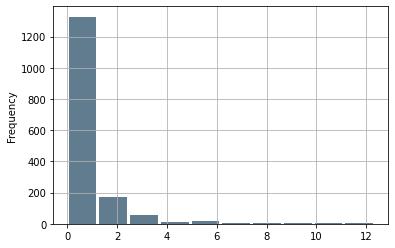

In [72]:
cer_list['Cer'].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')

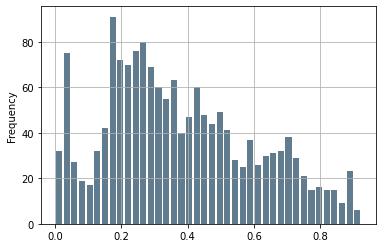

In [73]:
cer_list['Cer_abydos'].plot.hist(grid=True, bins=40, rwidth=0.8,
                   color='#607c8e')

# Creating dfs

In [74]:
import pandas as pd
def make_df(file, numb = 1):
    with open(file) as f1:
        read = f1.readlines()
        pred = []
        true = []
        for sent in read:
            if numb ==1:
                #print(sent)
                pred_sent = sent.split('|||')[0].replace('\n', '')
                true_sent = sent.split('|||')[1]
                #print(pred_sent)
                pred.append(pred_sent)
                true.append(true_sent)
            else:
                #print(sent)
                pred_sent = sent.split('|||')[1].replace('\n', '')
                true_sent = sent.split('|||')[0]
                #print(pred_sent)
                pred.append(pred_sent)
                true.append(true_sent)
        list_of_tuples = list(zip(pred, true)) 
        df = pd.DataFrame(list_of_tuples,
                  columns = ['Prediction', 'True_text']) 
        return df, pred,true

In [90]:
def find_cer_abydos_sents(pred, true):
    li_pred_ipa = []
    li_true_ipa = []
    for elem in pred:
        conv = ''
        for i in range(len(elem)):
        #print(elem)
            conv += epi.transliterate(elem[i])+' '
        li_pred_ipa.append(conv)
    for elem in true:
        #elem = elem.split()
        conv= ''
        for i in range(len(elem)):
            if re.search(r'[a-z]', elem[i]):
                conv += epi2.transliterate(elem[i]) + ' '
            else:
                conv += epi.transliterate(elem[i]) + ' '
        li_true_ipa.append(conv)
    return li_pred_ipa, li_true_ipa

In [117]:
t = make_df('/content/fast_align/build/preproc_985.ru-ru')

In [ ]:
#nævəɡejʃən dɹɔɹ bokovaa panelʲ navʲiɡat͡sii 
#navaɡejʂendror bokovaa panelʲ navʲiɡat͡sii

In [ ]:
preproc_985_conv[2]

In [91]:
ipa_sents =find_cer_abydos_sents(preproc_985_conv[2], preproc_985_conv[3])

In [92]:
len(ipa_sents[0])

985

In [93]:
list_of_tuples1 = list(zip(ipa_sents[0], ipa_sents[1]))

In [94]:
df = pd.DataFrame(list_of_tuples1,
                  columns = ['Prediction', 'True_text']) 

In [95]:
df

,Prediction,True_text
0,navaɡejʂendror navaɡejʂendror bokovaa panelʲ n...,nævəɡejʃən dɹɔɹ bokovaa panelʲ navʲiɡat͡sii
1,nevaɡej ʂinba pʲerʲeimʲanovannɨj botom nevaɡej...,nævəɡejʃən bɑɹ pʲerʲeimʲenovannɨj bɑtəm nævəɡe...
2,s matʲirʲil trʲi v androitunifʲit͡sirovalʲi an...,s mətɪɹiəl 3 v ændɹojd unifʲit͡sirovalʲi nejmʲ...
3,vandrued vandrued vsʲu ʒiznʲ bɨlo dva sposoba ...,v ændɹojd vsʲu ʒiznʲ bɨlo dva sposoba postroit...
4,pravda na planʂetax etot dʲialoɡ budʲet ne pol...,pravda na planʂetax etot dʲialoɡ budʲet ne pol...
...,...,...
980,v lʲeɡasʲi proektax obɨt͡ɕʲna etopkampa etopka...,v lʲeɡasʲi proektax obɨt͡ɕʲno eto æpkɑmpæt tʲe...
981,poetomu nuʒen most mʲeʒdu dvumʲa tʲemamʲi,poetomu nuʒen most mʲeʒdu dvumʲa tʲemamʲi
982,v sostavʲe kampanost jestʲ obkampatsʲim udobna...,v sostavʲe əkʌmpənəst jestʲ æpkɑmpɑtθejm udobn...
983,isxodnikʲi prostɨe ix moʒno dopolnitʲ ilʲi sdʲ...,isxodnikʲi prostɨe ix moʒno dopolnitʲ ilʲi sdʲ...


In [96]:
cer_sents_ipa = get_cer(ipa_sents)

In [97]:
def get_abydos_cer(s):
    errors = []
    for i in range(len(s[0])):
        true_text = remove_affricates(s[0][i])
        prediction = remove_affricates(s[1][i])
        cer = round(cmp.dist(prediction, true_text),3)
        errors.append(cer)
    return errors

In [98]:
cer_ab_sents = get_abydos_cer(ipa_sents)

In [99]:
df['Cer'] = cer_sents_ipa
df['Cer_abydos'] = cer_ab_sents

In [101]:
def get_wer(s):
    errors = []
    for i in range(len(s[0])):
        true_text = remove_affricates(s[0][i])
        prediction = remove_affricates(s[1][i])
        print(prediction, true_text)
        werr= wer(prediction, true_text)
        errors.append(werr)
    return errors

In [ ]:
wer = get_wer(ipa_sents)

In [103]:
df['Wer'] = wer

In [104]:
df

,Prediction,True_text,Cer,Cer_abydos,Wer
0,navaɡejʂendror navaɡejʂendror bokovaa panelʲ n...,nævəɡejʃən dɹɔɹ bokovaa panelʲ navʲiɡat͡sii,-,0.256,0.400000
1,nevaɡej ʂinba pʲerʲeimʲanovannɨj botom nevaɡej...,nævəɡejʃən bɑɹ pʲerʲeimʲenovannɨj bɑtəm nævəɡe...,-,0.083,1.000000
2,s matʲirʲil trʲi v androitunifʲit͡sirovalʲi an...,s mətɪɹiəl 3 v ændɹojd unifʲit͡sirovalʲi nejmʲ...,-,0.262,0.466667
3,vandrued vandrued vsʲu ʒiznʲ bɨlo dva sposoba ...,v ændɹojd vsʲu ʒiznʲ bɨlo dva sposoba postroit...,-,0.106,0.266667
4,pravda na planʂetax etot dʲialoɡ budʲet ne pol...,pravda na planʂetax etot dʲialoɡ budʲet ne pol...,-,0.151,0.200000
...,...,...,...,...,...
980,v lʲeɡasʲi proektax obɨt͡ɕʲna etopkampa etopka...,v lʲeɡasʲi proektax obɨt͡ɕʲno eto æpkɑmpæt tʲe...,-,0.117,0.357143
981,poetomu nuʒen most mʲeʒdu dvumʲa tʲemamʲi,poetomu nuʒen most mʲeʒdu dvumʲa tʲemamʲi,0.0,0.000,0.000000
982,v sostavʲe kampanost jestʲ obkampatsʲim udobna...,v sostavʲe əkʌmpənəst jestʲ æpkɑmpɑtθejm udobn...,-,0.086,0.333333
983,isxodnikʲi prostɨe ix moʒno dopolnitʲ ilʲi sdʲ...,isxodnikʲi prostɨe ix moʒno dopolnitʲ ilʲi sdʲ...,0.008,0.002,0.058824


In [105]:
df.to_csv('/content/sents_ipa_cer.csv')

In [121]:
cer_preproc_1000_true = get_cer((preproc_985_conv[2], preproc_985_conv[3]))

In [108]:
import pandas as pd
def find_cer_only_eng(new_li_ipa_opp):
    errors = []
    errors2 = []
    new_li_true = []
    new_li_pred = []
    for i in range(len(new_li_ipa_opp[0])):
        true_text = new_li_ipa_opp[1][i]
        prediction = new_li_ipa_opp[0][i]
        error = round(cer(prediction, true_text),3)
        pred = remove_affricates(prediction)
        true = remove_affricates(true_text)
        #print(pred, true)
        error2 = round(cmp.dist(pred, true), 3)
        errors.append(error)
        errors2.append(error2)
        new_li_true.append(true)
        new_li_pred.append(pred)
    print(len(errors))

    list_of_tuples = list(zip(new_li_true, new_li_pred)) 
    df = pd.DataFrame(list_of_tuples,
                  columns = ['True_text', 'Prediction'])
    df['Cer'] = errors
    df['Cer_abydos'] = errors2 
    return df, errors

In [ ]:
df_ru, errors_ru = find_cer_only_eng(li_985_ru)

In [109]:
df_ru

,True_text,Prediction,Cer,Cer_abydos
0,боковая,боковая,0.000,0.0
1,панель,панель,0.000,0.0
2,навигации,навигации,0.000,0.0
3,переименованный,переимянованный,0.067,0.0
4,с,с,0.000,0.0
...,...,...,...,...
11752,согласно,согласно,0.000,0.0
11753,документации,документации,0.000,0.0
11754,надо,надо,0.000,0.0
11755,использовать,использовать,0.000,0.0


In [110]:
df_ru[df_ru['Cer']>3].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 599 to 11306
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   True_text   50 non-null     object 
 1   Prediction  50 non-null     object 
 2   Cer         50 non-null     float64
 3   Cer_abydos  50 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.0+ KB


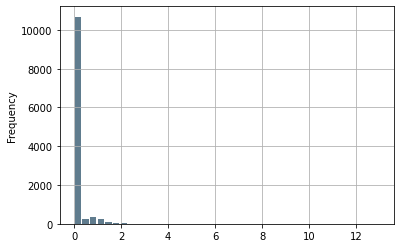

In [111]:
df_ru['Cer'].plot.hist(grid=True, bins=40, rwidth=0.8,
                   color='#607c8e')

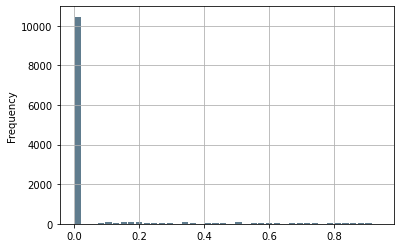

In [112]:
df_ru['Cer_abydos'].plot.hist(grid=True, bins=40, rwidth=0.8,
                   color='#607c8e')

In [ ]:
df_ru.to_csv('/content/ru_without_align_985.csv')

In [ ]:
df_eng, errors = find_cer_only_eng(new_li_ipa)

In [ ]:
df_eng.to_csv('/content/eng_without.csv')

In [ ]:
df_eng[df_eng['True_text'] == 'd͡ʒɛtpæk']

,True_text,Prediction,Cer,Cer_abydos


In [ ]:
df_eng[df_eng['Cer'] > 3]

,True_text,Prediction,Cer,Cer_abydos
1,dɹɔɹ,navaɡejʂendror,3.250,0.728
27,18dp,vosʲemnadt͡satʲi,3.750,0.877
40,ui,komponentam,5.500,0.824
65,fæb,tʲiplard͡ʒe,3.667,0.726
116,ɪf,pʲerʲevodt͡ɕʲikʲi,8.500,0.883
...,...,...,...,...
1900,fps,sfrʲemʲeejt,3.333,0.742
1909,ɹɔ,prʲinimaet,5.000,0.819
1962,mɛʃ,elʲemʲentarnoɡo,4.667,0.817
1967,dɑkɹ̩,skampʲelʲirujtʲe,3.200,0.724


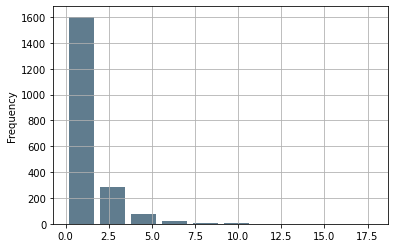

In [ ]:
df_eng['Cer'].plot.hist(grid=True, bins=10, rwidth=0.8,
                   color='#607c8e')

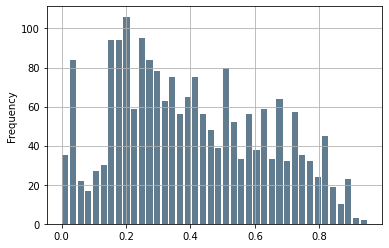

In [ ]:
df_eng['Cer_abydos'].plot.hist(grid=True, bins=40, rwidth=0.8,
                   color='#607c8e')

In [ ]:
df_eng.to_csv('/content/english_without_align.csv')

In [118]:
import jiwer

In [119]:
import ssl
li1 = []
li2 = []
for elem in preproc_985_conv[2]:
    sent = jiwer.ReduceToSingleSentence()(elem)
    ss = ' '.join(sent)
    li1.append(ss)
for elem1 in preproc_985_conv[3]:
    sent1 = jiwer.ReduceToSingleSentence()(elem1)
    ss1 = ' '.join(sent1)
    li2.append(ss1)
list_of_tuples = list(zip(li1, li2)) 
t_new = pd.DataFrame(list_of_tuples,
                  columns = ['Prediction', 'True_text']) 

In [122]:
t_new['cer_with_preproc'] = cer_preproc_1000_true

In [123]:
cee=get_cer((li1, li2))

In [124]:
li2[1]

'navigation bar переименованный bottom navigation'

In [125]:
errrr = []
for i in range(len(li1)):
    werr = jiwer.wer(li1[i], li2[i])
    errrr.append(werr)

In [126]:
t_new['Wer'] = errrr

In [127]:
t_new['New_cer'] =cee

In [128]:
t_new[t_new['New_cer'] != '-']

,Prediction,True_text,cer_with_preproc,Wer,New_cer
8,тезисно много нового появилось в политри матер...,тезисно много нового появилось в палитре mater...,0.144578,0.266667,0.123711
16,новые в обычных кнопках полностью закруглили углы,новое в обычных кнопках полностью закруглили углы,0.023256,0.142857,0.020408
19,поговорим подробнее про каждый из компонентов,поговорим подробнее про каждый из компонентов,0.000000,0.000000,0.0
23,ближайший визуальный аналок обычная кнобка,ближайший визуальный аналог обычная кнопка,0.052632,0.400000,0.047619
25,теперь они все одинаковые премолгольные с закр...,теперь они все одинаковые прямоугольные с закр...,0.035714,0.111111,0.03125
...,...,...,...,...,...
969,такой вариант тоже будет работать,такой вариант тоже будет работать,0.000000,0.000000,0.0
970,начнем с простого куба,начнем с простого куба,0.000000,0.000000,0.0
971,в дальнейшем контейнер будет брать файлы именн...,в дальнейшем контейнер будет брать файлы именн...,0.019231,0.100000,0.016393
981,поэтому нужен мост между двумя темами,поэтому нужен мост между двумя темами,0.000000,0.000000,0.0


In [45]:
t_new.to_csv('/content/985_true_preproc_wer_new.csv')
#t1.to_csv('1000_opp.csv')

In [130]:
t1_copy = t[0].copy()

In [ ]:
t1_copy[t1_copy['cer_with_preproc'] <0.07]

,Prediction,True_text,cer_with_preproc
12,а вот карточки сильно перерабатывать мне стали,а вот карточки сильно перерабатывать не стали,0.025000
16,новые в обычных кнопках полностью закруглили у...,новое в обычных кнопках полностью закруглили ...,0.023256
19,поговорим подробнее про каждый из компонентов,поговорим подробнее про каждый из компонентов,0.000000
23,ближайший визуальный аналок обычная кнобка,ближайший визуальный аналог обычная кнопка,0.052632
25,теперь они все одинаковые премолгольные с зак...,теперь они все одинаковые прямоугольные с зак...,0.035714
...,...,...,...
971,в дальнейшем контейнер будет брать файлы именн...,в дальнейшем контейнер будет брать файлы имен...,0.019231
974,в планировании архитектуры программы количеств...,в планировании архитектуры программы количест...,0.016807
979,в легасе проекте тема может быть достаточно бо...,в легаси проекте тема может быть достаточно б...,0.034884
981,поэтому нужен мост между двумя темами,поэтому нужен мост между двумя темами,0.000000


In [ ]:
t_eng = t1_copy[t1_copy['True_text'].str.contains('[a-z]', regex = True)]

In [ ]:
t_ru = t1_copy[~t1_copy['True_text'].str.contains('[a-z]', regex = True)]

In [ ]:
t_ru

,Prediction,True_text,cer_with_preproc
4,правда на планшетах этот диалог будет не полно...,правда на планшетах этот диалог будет не полн...,0.194030
5,их можно использовать для вода данных наикрана...,их можно использовать для ввода данных на экр...,0.161765
12,а вот карточки сильно перерабатывать мне стали,а вот карточки сильно перерабатывать не стали,0.025000
16,новые в обычных кнопках полностью закруглили у...,новое в обычных кнопках полностью закруглили ...,0.023256
19,поговорим подробнее про каждый из компонентов,поговорим подробнее про каждый из компонентов,0.000000
...,...,...,...
974,в планировании архитектуры программы количеств...,в планировании архитектуры программы количест...,0.016807
977,если над объектом необходимо произвести некото...,если над объектом необходимо произвести некот...,0.089552
979,в легасе проекте тема может быть достаточно бо...,в легаси проекте тема может быть достаточно б...,0.034884
981,поэтому нужен мост между двумя темами,поэтому нужен мост между двумя темами,0.000000


In [ ]:
t_eng

,Prediction,True_text,cer_with_preproc
0,навагейшендрор боковая панель навигации,navigation drawer боковая панель навигации,0.560000
1,невагей шинба переимянованный ботом невагейшин,navigation bar переименованный bottom navigation,0.761905
2,с матирил три в андроитунифицировали наеминг б...,с material 3 в android унифицировали нейминг ...,0.598131
3,вандруед всю жизнь было два способа построить ...,в android всю жизнь было два способа построит...,0.325301
6,также гугол выкотил гайдлайны по реализации по...,также google выкатил гайдлайны по реализации ...,0.118644
...,...,...,...
976,если нужен остел олпонскат умеет рендерить фай...,если нужен stl openscad умеет рендерить файлы...,0.205479
978,пример вызова из джупета-ноутб общий принцип ...,пример вызова из jupyter notebook общий принц...,0.341772
980,в легаси проектах обычна этопкампа тема в то ...,в легаси проектах обычно это appcompat тема в...,0.439024
982,в составе кампаност есть обкампатсим удобная о...,в составе accompanist есть appcompattheme удо...,0.442105


In [ ]:
t_eng[t_eng['cer_with_preproc'] < 0.1].sample(5).T

,800,946,869,866,167
Prediction,пользователь профессиональные гэппеа в сервера...,в последующих примерах при построении фрактало...,остаются только их вариации он цвета,он цвета цвета которые будут идеально смотрет...,то есть фмпек вполне можно выбрать для качеств...
True_text,пользователь профессиональные gpu в серверах ...,в последующих примерах при построении фрактал...,остаются только их вариации on цвета,on цвета цвета которые будут идеально смотрет...,то есть ffmpeg вполне можно выбрать для качес...
cer_with_preproc,0.087719,0.066265,0.064516,0.040323,0.046875


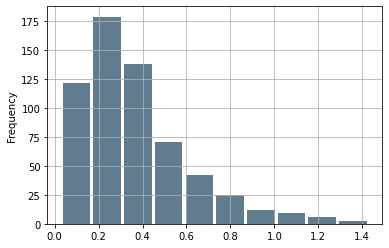

In [ ]:
t_eng['cer_with_preproc'].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')


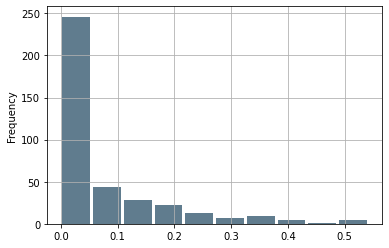

In [ ]:
t_ru['cer_with_preproc'].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')

csv files - t_ru, t_eng, пословный алайнмент отдельно и то, что есть сейчас. Для одного варианта

In [ ]:
t_eng.to_csv('/content/t_eng.csv')
t_ru.to_csv('/content/t_ru.csv')

Text(0.5, 1.0, 'Распределение CER в предложениях')

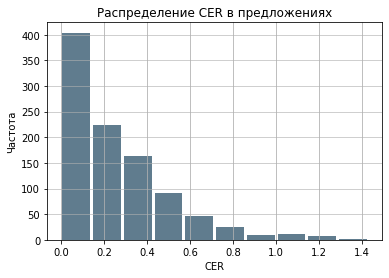

In [53]:
import matplotlib.pyplot as plt
t_new['cer_with_preproc'].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('CER')
plt.ylabel('Частота')
plt.title('Распределение CER в предложениях')

Text(0.5, 1.0, 'Распределение WER в предложениях')

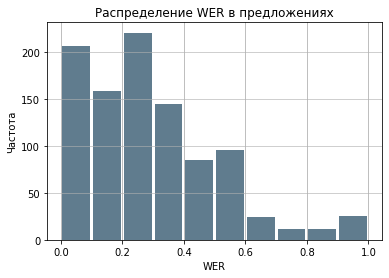

In [133]:
import matplotlib.pyplot as plt
t_new['Wer'].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('WER')
plt.ylabel('Частота')
plt.title('Распределение WER в предложениях')

In [137]:
t_new['Wer'].mean()

0.2814393904691566

In [62]:
import pandas as pd
sents_all_ipa = pd.read_csv('/content/sents_ipa_cer.csv')

In [63]:
sents_all_ipa

,Unnamed: 0,Prediction,True_text,Cer,Cer_abydos,true_sent,Wer
0,0,navaɡejʂendror bokovaa panelʲ navʲiɡat͡sii,nævəɡejʃən dɹɔɹ bokovaa panelʲ navʲiɡat͡sii,-,0.036,navigation drawer боковая панель навигации\n,0.400000
1,1,nevaɡej ʂinba pʲerʲeimʲanovannɨj botom nevaɡej...,nævəɡejʃən bɑɹ pʲerʲeimʲenovannɨj bɑtəm nævəɡe...,-,0.083,navigation bar переименованный bottom navigat...,1.000000
2,2,s matʲirʲil trʲi v androitunifʲit͡sirovalʲi na...,s mətɪɹiəl 3 v ændɹojd unifʲit͡sirovalʲi nejmʲ...,-,0.086,с material 3 в android унифицировали нейминг ...,0.466667
3,3,vandrued vsʲu ʒiznʲ bɨlo dva sposoba postroitʲ...,v ændɹojd vsʲu ʒiznʲ bɨlo dva sposoba postroit...,0.1368421052631579,0.063,в android всю жизнь было два способа построит...,0.266667
4,4,pravda na planʂetax etot dʲialoɡ budʲet ne pol...,pravda na planʂetax etot dʲialoɡ budʲet ne pol...,-,0.029,правда на планшетах этот диалог будет не полн...,0.200000
...,...,...,...,...,...,...,...
980,980,v lʲeɡasʲi proektax obɨt͡ɕʲna etopkampa tʲema ...,v lʲeɡasʲi proektax obɨt͡ɕʲno eto æpkɑmpæt tʲe...,0.18556701030927836,0.079,в легаси проектах обычно это appcompat тема в...,0.357143
981,981,poetomu nuʒen most mʲeʒdu dvumʲa tʲemamʲi,poetomu nuʒen most mʲeʒdu dvumʲa tʲemamʲi,0.0,0.000,поэтому нужен мост между двумя темами\n,0.000000
982,982,v sostavʲe kampanost estʲ obkampatsʲim udobnaa...,v sostavʲe əkʌmpənəst jestʲ æpkɑmpɑtθejm udobn...,-,0.077,в составе accompanist есть appcompattheme удо...,0.444444
983,983,isxodnikʲi prostɨe ix moʒno dopolnitʲ ilʲi sdʲ...,isxodnikʲi prostɨe ix moʒno dopolnitʲ ilʲi sdʲ...,-,0.010,исходники простые их можно дополнить или сдел...,0.117647


Text(0.5, 1.0, 'Распределение CER в предложениях, переведенных в МФА')

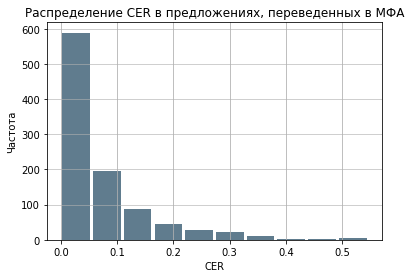

In [66]:

sents_all_ipa['Cer_abydos'].plot.hist(grid=True, bins=10, rwidth=0.9,
                   color='#607c8e')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('CER')
plt.ylabel('Частота')
plt.title('Распределение CER в предложениях, переведенных в МФА')

In [67]:
sents_all_ipa[sents_all_ipa['Cer_abydos'] >0.4]

,Unnamed: 0,Prediction,True_text,Cer,Cer_abydos,true_sent,Wer
221,221,v etom slut͡ɕʲae smotrʲitʲe v storonu bʲil taj...,flejvɹ̩z ne lut͡ɕʲʂij vɨbor jeslʲi vam nuʒno p...,-,0.521,flavors не лучший выбор если вам нужно просто...,2.157895
272,272,ibɨdʲesʲiɡnablʲes rasʂirʲenie do urovne fʲiɡma...,ɪb dɛzəɡnəbəlz rasʂirʲenie do urovna fɪɡmə zkowd,-,0.546,ib designables расширение до уровня figma xco...,1.571429
468,468,sʲinoma t͡ɕʲetɨrʲe dʲe,sɪnəmə 4di,-,0.513,cinema 4d\n,1.500000
497,497,jeslʲi v dvʲe tɨsʲat͡ɕʲa vosʲemnadt͡satom ɡodu...,jeslʲi v 2018 ɡodu lʲudʲi tratʲilʲi na prosmot...,-,0.458,если в 2018 году люди тратили на просмотр вид...,0.708333
916,916,v obɕːem nado sdʲelatʲ t͡ɕʲto-to tʲipa toɡo fp...,v obɕːem nado sdʲelatʲ t͡ɕʲto to tʲipa toɡo fm...,-,0.420,в общем надо сделать что то типа того ffmpeg ...,0.818182
934,934,naprʲimʲeru utʲu prajmoj rʲet͡svʲet rʲeʂetka f...,naprʲimʲer u jutub pɹajmɛɹi t͡svʲet f0000 kras...,-,0.508,например у youtube primary цвет ff0000 красны...,1.181818


In [68]:
sents_all_ipa_1= sents_all_ipa.copy()


In [69]:
sents_all_ipa_1['Numbers Only'] = sents_all_ipa_1['true_sent'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [70]:
sents_all_ipa_1

,Unnamed: 0,Prediction,True_text,Cer,Cer_abydos,true_sent,Wer,Numbers Only
0,0,navaɡejʂendror bokovaa panelʲ navʲiɡat͡sii,nævəɡejʃən dɹɔɹ bokovaa panelʲ navʲiɡat͡sii,-,0.036,navigation drawer боковая панель навигации\n,0.400000,NaN
1,1,nevaɡej ʂinba pʲerʲeimʲanovannɨj botom nevaɡej...,nævəɡejʃən bɑɹ pʲerʲeimʲenovannɨj bɑtəm nævəɡe...,-,0.083,navigation bar переименованный bottom navigat...,1.000000,NaN
2,2,s matʲirʲil trʲi v androitunifʲit͡sirovalʲi na...,s mətɪɹiəl 3 v ændɹojd unifʲit͡sirovalʲi nejmʲ...,-,0.086,с material 3 в android унифицировали нейминг ...,0.466667,3.0
3,3,vandrued vsʲu ʒiznʲ bɨlo dva sposoba postroitʲ...,v ændɹojd vsʲu ʒiznʲ bɨlo dva sposoba postroit...,0.1368421052631579,0.063,в android всю жизнь было два способа построит...,0.266667,NaN
4,4,pravda na planʂetax etot dʲialoɡ budʲet ne pol...,pravda na planʂetax etot dʲialoɡ budʲet ne pol...,-,0.029,правда на планшетах этот диалог будет не полн...,0.200000,NaN
...,...,...,...,...,...,...,...,...
980,980,v lʲeɡasʲi proektax obɨt͡ɕʲna etopkampa tʲema ...,v lʲeɡasʲi proektax obɨt͡ɕʲno eto æpkɑmpæt tʲe...,0.18556701030927836,0.079,в легаси проектах обычно это appcompat тема в...,0.357143,NaN
981,981,poetomu nuʒen most mʲeʒdu dvumʲa tʲemamʲi,poetomu nuʒen most mʲeʒdu dvumʲa tʲemamʲi,0.0,0.000,поэтому нужен мост между двумя темами\n,0.000000,NaN
982,982,v sostavʲe kampanost estʲ obkampatsʲim udobnaa...,v sostavʲe əkʌmpənəst jestʲ æpkɑmpɑtθejm udobn...,-,0.077,в составе accompanist есть appcompattheme удо...,0.444444,NaN
983,983,isxodnikʲi prostɨe ix moʒno dopolnitʲ ilʲi sdʲ...,isxodnikʲi prostɨe ix moʒno dopolnitʲ ilʲi sdʲ...,-,0.010,исходники простые их можно дополнить или сдел...,0.117647,NaN
